In [1]:
import numpy as np
import netCDF4 as nc
import sys,os

import pandas as pd
from imogen import data_info
#import iris
#import iris.plot as iplt
#import iris.quickplot as qplt

from PlotTools import plot_tools as PTs

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,16)
%matplotlib inline


In [2]:
GtC_to_ppm=0.471
ppm_to_kgC = 1e12/GtC_to_ppm


Tile_names=data_info.TILE_short_names()
Tile_colours = data_info.TILE_colours()
nTiles=len(Tile_names)


In [3]:
CONFIG= 'BASELINE_CONFIG'  #'METHANE_FEEDBACK'  #  

DATA_DIR = '/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/'+CONFIG+'/'
PLOT_DIR = '/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/plots/'+CONFIG+'_withPresentDay/'


os.system('mkdir '+PLOT_DIR)


256

In [4]:
ANCILS_DIR='/prj/CLIFFTOP/COMMON_DATA/ANCILS/'
GRID_file= ANCILS_DIR+'grid_info.nc'
grinf=nc.Dataset(GRID_file,'r')
lats_2d = grinf.variables['latitude'][:]
lons_2d = grinf.variables['longitude'][:]
Area_2d = grinf.variables['Area'][:]
land_index = grinf.variables['land_index'][:]
grinf.close()

AREA_file=ANCILS_DIR+'Area_in_iris_format.nc'
Ainf=nc.Dataset(AREA_file,'r')
AREA_1D = Ainf.variables['area'][:]
Ainf.close()

# soil layer thicknesses
#dz_soil= np.array([0.05,0.08408964,0.11397535,0.14142136,0.16718508,0.19168293,
#                   0.21517585,0.23784142,0.25980762,0.28117066,0.30200527,
#                   0.32237098,0.34231625,0.36188121])
#dweight_soil = dz_soil/np.sum(dz_soil)
#print(np.sum(dweight_soil))
#print(dweight_soil)

tiles= data_info.TILE_short_names


In [14]:
#GCMs = ['CEN_CSIRO-QCCCE_MOD_CSIRO-Mk3-6-0','CEN_MOHC_MOD_HadGEM2-ES','CEN_NOAA-GFDL_MOD_GFDL-ESM2G']
#GCMs  = ['CEN_BCC_MOD_bcc-csm1-1-m','CEN_BCC_MOD_bcc-csm1-1','CEN_CCCma_MOD_CanESM2','CEN_CMCC_MOD_CMCC-CMS',
#         'CEN_CSIRO-BOM_MOD_ACCESS1-0','CEN_CSIRO-BOM_MOD_ACCESS1-3','CEN_CNRM-CERFACS_MOD_CNRM-CM5',
#         'CEN_CSIRO-QCCCE_MOD_CSIRO-Mk3-6-0','CEN_INM_MOD_inmcm4','CEN_IPSL_MOD_IPSL-CM5B-LR',
#         'CEN_IPSL_MOD_IPSL-CM5A-MR','CEN_MIROC_MOD_MIROC-ESM-CHEM','CEN_MIROC_MOD_MIROC-ESM',
#         'CEN_MIROC_MOD_MIROC5','CEN_MOHC_MOD_HadGEM2-CC']
GCMs=data_info.GCMs()#[1:2]
#GCMs.pop(1)
#GCMs.pop(2)
print(GCMs)
nGCMs = len(GCMs)
SCENARIOs = ['presentday','1p5equi','2equi']
#SCENARIOs = ['1p5equi','2equi']
#SCENARIOs = ['2equi']
SCENARIO_names=['Present Day','1.5$^o$C','2.0$^o$C']
#SCENARIO_names=['1.5$^o$C','2.0$^o$C']
#SCENARIO_names=['2 K']
nSCENARIOs=len(SCENARIOs)
runid='EQUI'

pre_industrial_file='/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/PRE_INDUSTRIAL/vn4.8_imogen.spinup_2000.dump.1850_zeroDtemp_zeroWP.nc'

['CEN_BCC_MOD_bcc-csm1-1', 'CEN_BCC_MOD_bcc-csm1-1-m', 'CEN_BNU_MOD_BNU-ESM', 'CEN_CCCma_MOD_CanESM2', 'CEN_CMCC_MOD_CMCC-CMS', 'CEN_CNRM-CERFACS_MOD_CNRM-CM5', 'CEN_CSIRO-BOM_MOD_ACCESS1-0', 'CEN_CSIRO-BOM_MOD_ACCESS1-3', 'CEN_CSIRO-QCCCE_MOD_CSIRO-Mk3-6-0', 'CEN_INM_MOD_inmcm4', 'CEN_IPSL_MOD_IPSL-CM5A-LR', 'CEN_IPSL_MOD_IPSL-CM5A-MR', 'CEN_IPSL_MOD_IPSL-CM5B-LR', 'CEN_MIROC_MOD_MIROC5', 'CEN_MIROC_MOD_MIROC-ESM', 'CEN_MIROC_MOD_MIROC-ESM-CHEM', 'CEN_MOHC_MOD_HadGEM2-CC', 'CEN_MOHC_MOD_HadGEM2-ES', 'CEN_MPI-M_MOD_MPI-ESM-LR', 'CEN_MPI-M_MOD_MPI-ESM-MR', 'CEN_MRI_MOD_MRI-CGCM3', 'CEN_NASA-GISS_MOD_GISS-E2-H', 'CEN_NASA-GISS_MOD_GISS-E2-H-CC', 'CEN_NASA-GISS_MOD_GISS-E2-R', 'CEN_NASA-GISS_MOD_GISS-E2-R-CC', 'CEN_NCAR_MOD_CCSM4', 'CEN_NCC_MOD_NorESM1-M', 'CEN_NCC_MOD_NorESM1-ME', 'CEN_NOAA-GFDL_MOD_GFDL-CM3', 'CEN_NOAA-GFDL_MOD_GFDL-ESM2G', 'CEN_NOAA-GFDL_MOD_GFDL-ESM2M', 'CEN_NSF-DOE-NCAR_MOD_CESM1-BGC', 'CEN_NSF-DOE-NCAR_MOD_CESM1-CAM5', 'CEN_NSF-DOE-NCAR_MOD_CESM1-WACCM']


In [15]:
print(nGCMs)

34


In [16]:
dump_vars=['co2_mmr','cv','cs','frac','dtemp_o','wood_prod_fast','wood_prod_med','wood_prod_slow']
stock_vars = ['CV','CS','AtmCO2_ppm','AtmCO2_kg','frac','Woody_Products']#,'OceanCO2']
map_vars = ['CV','CS','Max_Frac']+[Tname for Tname in Tile_names ]

DATA_DICT={}
MAPDATA_DICT={ scenario:{var: [] for var in map_vars} for scenario in SCENARIOs }

for scenario in SCENARIOs:
    print('Scenario: ',scenario)
    DATA_DICT[scenario]={ var:[] for var in stock_vars  }
    for gcm in GCMs:
        print('GCM: ',gcm)
        #DUMP_FILE=DATA_DIR+gcm+'/'+runid+'_'+gcm+'_'+scenario+'.dump.21000101.0.nc'
        DUMP_FILE=DATA_DIR+gcm+'/'+runid+'_'+gcm+'_'+scenario+'.dump.nc'
        print(DUMP_FILE)
        DINF = nc.Dataset(DUMP_FILE,'r')
        
        #Ann_File=DATA_DIR+runid+'_'+gcm+'_'+scenario+'.Annual_carbon.nc'
        #print(Ann_File)
        #Ainf=nc.Dataset(Ann_File,'r')
        
        # Read in Vegetation Carbon which  is just on land points:
        CV = DINF.variables['cv'][:]
        # store mapping data
        print(CV.shape)
        MAPDATA_DICT[scenario]['CV'].append(CV)
        # Sum CV over land points
        CV = np.sum(CV*AREA_1D)
        #CV = np.sum(Ainf.variables['cv'][:].squeeze()*AREA_1D)
        #print('CV = ',CV)
        DATA_DICT[scenario]['CV'].append(CV)
        
        # Soil Carbon needs to be summed over pools and layers
        # extract and sum over pools, 1st dimension
        CS = np.sum(DINF.variables['cs'][:],axis=0)
        # sum over layers
        CS = np.sum( CS,axis=0 )
        # Store map data:
        MAPDATA_DICT[scenario]['CS'].append(CS)
        # finally sum over land points:
        CS = np.sum( CS*AREA_1D )
        #CS = np.sum(Ainf.variables['cs_gb'][:].squeeze()*AREA_1D)
        #print('CS = ', CS)
        DATA_DICT[scenario]['CS'].append(CS)
        
        WP = ( DINF.variables['wood_prod_fast'][:]+ \
               DINF.variables['wood_prod_med'][:] + \
               DINF.variables['wood_prod_slow'][:]  ) * AREA_1D
        WP = np.sum(WP)
        print('WP:',WP)
        DATA_DICT[scenario]['Woody_Products'].append(WP)
        
        #Atmospheric CO2 
        AtmCO2_ppm = DINF.variables['co2_ppmv'][0]
        AtmCO2_kg = AtmCO2_ppm*ppm_to_kgC
        #print('AtmCO2 = ',AtmCO2_kg)
        DATA_DICT[scenario]['AtmCO2_kg'].append(AtmCO2_kg)
        DATA_DICT[scenario]['AtmCO2_ppm'].append(AtmCO2_ppm)
        
        # Ocean CO2 from dtemp_o
        DTEMP_O = DINF.variables['dtemp_o'][:]
        OCEAN_CO2 = AtmCO2_ppm * np.exp(0.0423*DTEMP_O[0]) * ppm_to_kgC
        #print('OCEAN_CO2 = ',OCEAN_CO2)
        #DATA_DICT[scenario]['OceanCO2'].append(OCEAN_CO2)
        
        #Read in Frac Data
        FRAC = DINF.variables['frac'][:]
        for iTile in range(nTiles):
            MAPDATA_DICT[scenario][Tile_names[iTile]].append(FRAC[iTile,:])
        MAX_FRAC = np.argmax(FRAC,axis=0)
        MAPDATA_DICT[scenario]['Max_Frac']=MAX_FRAC
        print(MAX_FRAC.shape)
        FRAC = np.sum(FRAC*AREA_1D.squeeze()*1e-10,axis=1)  # m^2 to Mha
        DATA_DICT[scenario]['frac'].append(FRAC)
        #print(FRAC)
        
        
        DINF.close()
    print('=====================================================')
            
        


Scenario:  presentday
GCM:  CEN_BCC_MOD_bcc-csm1-1
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/BASELINE_CONFIG/CEN_BCC_MOD_bcc-csm1-1/EQUI_CEN_BCC_MOD_bcc-csm1-1_presentday.dump.nc
(1631,)
WP: 1.39626e+13
(1631,)
GCM:  CEN_BCC_MOD_bcc-csm1-1-m
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/BASELINE_CONFIG/CEN_BCC_MOD_bcc-csm1-1-m/EQUI_CEN_BCC_MOD_bcc-csm1-1-m_presentday.dump.nc
(1631,)
WP: 1.397e+13
(1631,)
GCM:  CEN_BNU_MOD_BNU-ESM
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/BASELINE_CONFIG/CEN_BNU_MOD_BNU-ESM/EQUI_CEN_BNU_MOD_BNU-ESM_presentday.dump.nc
(1631,)
WP: 1.39897e+13
(1631,)
GCM:  CEN_CCCma_MOD_CanESM2
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/BASELINE_CONFIG/CEN_CCCma_MOD_CanESM2/EQUI_CEN_CCCma_MOD_CanESM2_presentday.dump.nc
(1631,)
WP: 1.38553e+13
(1631,)
GCM:  CEN_CMCC_MOD_CMCC-CMS
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/BASELINE_CONFIG/CEN_CMCC_MOD_CMCC-CMS/EQUI_CEN_CMCC_MOD_CMCC-CMS_presentday.dump.nc
(1631,)
WP: 1.39174e+13
(1631,)
GCM:  CEN_CNRM-CERFACS_MOD_CNRM-CM

In [17]:
print(np.array(MAPDATA_DICT['1p5equi']['CV']).shape)
print(np.array(MAPDATA_DICT['2equi']['CV']).shape)

(34, 1631)
(34, 1631)


In [18]:

PreI_DICT={}
MapPreI_DICT={}
print('GCM: ',gcm)
DUMP_FILE=pre_industrial_file
print(DUMP_FILE)
DINF = nc.Dataset(DUMP_FILE,'r')

# Read in CV, land points only:
CV = DINF.variables['cv'][:]
# store map data
MapPreI_DICT['CV']=CV
# total:
CV = np.sum(CV*AREA_1D)
print('CV = ',CV)
PreI_DICT['CV']=CV

# Read in Soil Carbon, and sum over pools:
CS = np.sum(DINF.variables['cs'][:],axis=0)
# sum over layers:
CS = np.sum( CS,axis=0 )
#store 2D map
MapPreI_DICT['CS']=CS
# global total:
CS = np.sum( CS*AREA_1D )
print('CS = ', CS)
PreI_DICT['CS']=CS
        
#Atmospheric CO2 
AtmCO2_ppm = DINF.variables['co2_ppmv'][0]
AtmCO2_kg = AtmCO2_ppm*ppm_to_kgC
print('AtmCO2 = ',AtmCO2_kg)
PreI_DICT['AtmCO2_kg']=AtmCO2_kg
PreI_DICT['AtmCO2_ppm']=AtmCO2_ppm
        
# Ocean CO2 from dtemp_o
DTEMP_O = DINF.variables['dtemp_o'][:]
OCEAN_CO2 = AtmCO2_ppm * np.exp(0.0423*DTEMP_O[0]) * ppm_to_kgC
print('OCEAN_CO2 = ',OCEAN_CO2)
#PreI_DICT['OceanCO2']=OCEAN_CO2


FRAC = DINF.variables['frac'][:]
for iTile in range(nTiles):
    MapPreI_DICT[Tile_names[iTile]]=FRAC[iTile,:]

MAX_FRAC = np.argmax(FRAC,axis=0)
MapPreI_DICT['Max_Frac']=MAX_FRAC
print(MAX_FRAC.shape)
print(MAX_FRAC)
FRAC = np.sum(FRAC*AREA_1D.squeeze()*1e-10,axis=1)  # m^2 to Mha
print(FRAC.shape)
PreI_DICT['frac']=FRAC
print(FRAC)
        
DINF.close()



GCM:  CEN_NSF-DOE-NCAR_MOD_CESM1-WACCM
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/PRE_INDUSTRIAL/vn4.8_imogen.spinup_2000.dump.1850_zeroDtemp_zeroWP.nc
CV =  6.83353e+14
CS =  2.10271e+15
AtmCO2 =  6.04511690241e+14
OCEAN_CO2 =  6.04511690241e+14
(1631,)
[12  4 15 ..., 15 15 15]
(17,)
[  820.5189209   2190.92041016    52.80958176   166.2930603   1717.65087891
   795.76281738   287.37197876    97.12265015   820.1796875    182.64805603
   174.5848999    300.89349365   642.89398193    19.69851303   219.19793701
  4588.13964844   140.09387207]


(array([  53.,  284.,    0.,    0.,    0.,    1.,    0.,  443.,    0.,
          43.,    0.,   51.,    0.,    8.,    0.,   24.,   11.,    0.,
           0.,    0.,    8.,    0.,  114.,    0.,    0.,    0.,    3.,
           0.,  540.,   48.]),
 array([  0.        ,   0.53333333,   1.06666667,   1.6       ,
          2.13333333,   2.66666667,   3.2       ,   3.73333333,
          4.26666667,   4.8       ,   5.33333333,   5.86666667,
          6.4       ,   6.93333333,   7.46666667,   8.        ,
          8.53333333,   9.06666667,   9.6       ,  10.13333333,
         10.66666667,  11.2       ,  11.73333333,  12.26666667,
         12.8       ,  13.33333333,  13.86666667,  14.4       ,
         14.93333333,  15.46666667,  16.        ]),
 <a list of 30 Patch objects>)

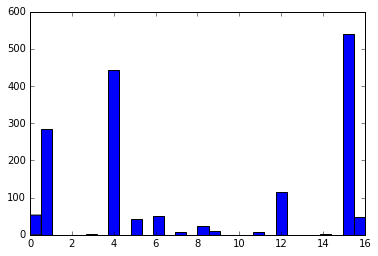

In [19]:
plt.hist(MAX_FRAC,bins=30)
#help(plt.hist)

[400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191]
[378.67252, 382.17834, 341.61151, 343.9595, 386.39966, 400.87384, 368.26279, 373.37292, 384.86887, 430.79688, 337.77771, 341.87662, 390.6246, 392.17596, 336.33231, 345.4635, 371.22977, 363.38449, 361.92096, 369.49399, 439.12997, 380.2699, 376.49005, 392.59561, 393.99091, 358.44028, 388.99408, 393.69666, 349.67511, 417.60156, 407.22208, 350.82394, 360.20728, 363.36609]
[425.36172, 430.55151, 371.30682, 374.68515, 436.81857, 458.44504, 410.02463, 417.53864, 434.54379, 503.79599, 365.80481, 371.68796, 443.10944, 445.42386, 363.73505, 376.85251, 414.38385, 402.87796, 400.73901, 411.83243, 516.57251, 427.72421, 422.13583, 

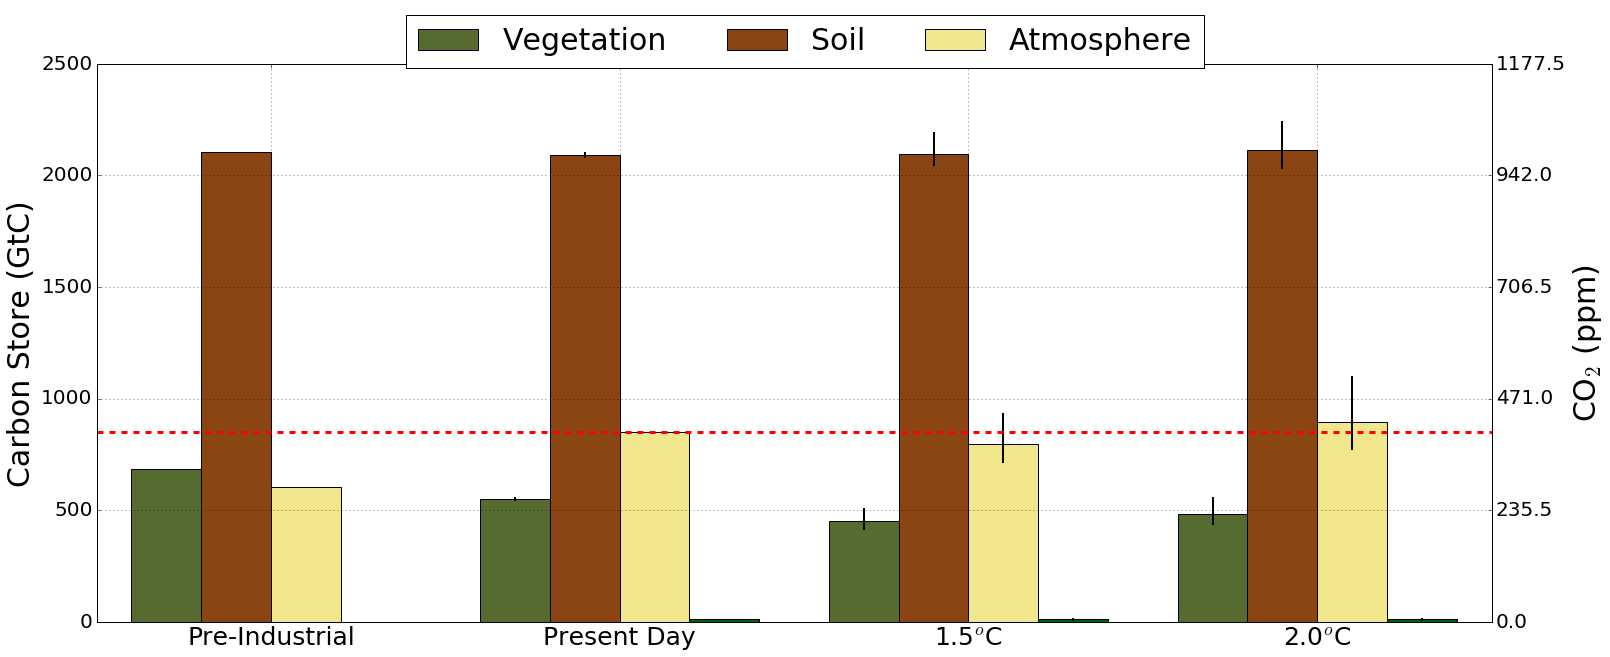

In [20]:
fig,ax=plt.subplots(ncols=1,nrows=1,figsize=[25,10])

bar_width=0.2
ax.set_xlim([0,nSCENARIOs+1.])

#Plot Pre-Industrial First
CV = np.array(PreI_DICT['CV'])*1e-12
CS = np.array(PreI_DICT['CS'])*1e-12
Land_C = CV+CS
AtmCO2 = np.array(PreI_DICT['AtmCO2_kg'])*1e-12
#OceanCO2 = np.array(DATA_DICT[scenario]['OceanCO2'])*1e-12
# Land position, iSCENARIO-0.2
iscenario=0
xpos = iscenario+0.5-0.4
cv_bar=ax.bar(xpos,np.mean(CV),color='darkolivegreen',width=bar_width)
#cs_bar=ax.bar(xpos,np.mean(CS),bottom=np.mean(CV),color='saddlebrown',width=bar_width)
ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(CV),np.max(CV)],c='k',lw=2)
xpos = iscenario+0.5-0.2
cs_bar=ax.bar(xpos,np.mean(CS),color='saddlebrown',width=bar_width)
ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(CS),np.max(CS)],c='k',lw=2)

xpos = iscenario+0.5-0.
atm_bar=ax.bar(xpos,np.mean(AtmCO2),color='khaki',width=bar_width)
ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(AtmCO2),np.max(AtmCO2)],c='k',lw=2)

#xpos = iscenario+0.5+0.2
#ocean_bar=ax.bar(xpos,np.mean(OceanCO2),color='turquoise',width=bar_width)
#ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(OceanCO2),np.max(OceanCO2)],c='k',lw=2)


for iscenario in range(nSCENARIOs):
    scenario=SCENARIOs[iscenario]
    CV = np.array(DATA_DICT[scenario]['CV'])*1e-12
    CS = np.array(DATA_DICT[scenario]['CS'])*1e-12
    WP = np.array(DATA_DICT[scenario]['Woody_Products'])*1e-12
    Land_C = CV+CS
    AtmCO2 = np.array(DATA_DICT[scenario]['AtmCO2_kg'])*1e-12
    #OceanCO2 = np.array(DATA_DICT[scenario]['OceanCO2'])*1e-12
    print(DATA_DICT[scenario]['AtmCO2_ppm'])
    
    # Land position, iSCENARIO-0.2
    xpos = iscenario+1.5-0.4
    ax.bar(xpos,np.mean(CV),color='darkolivegreen',width=bar_width)
    #cs_bar=ax.bar(xpos,np.mean(CS),bottom=np.mean(CV),color='saddlebrown',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(CV),np.max(CV)],c='k',lw=2)
    xpos = iscenario+1.5-0.2
    ax.bar(xpos,np.mean(CS),color='saddlebrown',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(CS),np.max(CS)],c='k',lw=2)
    
    xpos = iscenario+1.5+0.
    ax.bar(xpos,np.mean(AtmCO2),color='khaki',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(AtmCO2),np.max(AtmCO2)],c='k',lw=2)
    
    xpos = iscenario+1.5+0.2
    ax.bar(xpos,np.mean(WP),color='darkgreen',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(WP),np.max(WP)],c='k',lw=2)
    
    #xpos = iscenario+0.5+0.2
    #ocean_bar=ax.bar(xpos,np.mean(OceanCO2),color='turquoise',width=bar_width)
    #ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(OceanCO2),np.max(OceanCO2)],c='k',lw=2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0.5,nSCENARIOs+1,1.))
ax.set_xticklabels(['Pre-Industrial']+SCENARIO_names,fontsize=25)
ax.set_ylabel('Carbon Store (GtC)',fontsize=30)
ax.tick_params(axis='y',labelsize=20)
ax.grid(True)

# right hand labels in ppm
ax2=ax.twinx()
ax2.set_ylabel('CO$_2$ (ppm)',fontsize=30)
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks=ax.get_yticks()
ax2.set_yticklabels([label*GtC_to_ppm for label in ax.get_yticks()])
ax2.tick_params(axis='y',labelsize=20)
#Plot present day CO2 in red:
present_CO2=400/GtC_to_ppm
ax2.plot(ax2.get_xlim(),[present_CO2,present_CO2],c='r',lw=3,ls='--')


#fig.legend([cv_bar,cs_bar,atm_bar,ocean_bar],['Vegetation','Soil','Atmosphere','Ocean'],\
#          loc='upper center',ncol=4,fontsize=30)
fig.legend([cv_bar,cs_bar,atm_bar],['Vegetation','Soil','Atmosphere'],\
          loc='upper center',ncol=4,fontsize=30)
fig.savefig(PLOT_DIR+'Equilibrium_CarbonStores.png')

[400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191, 400.39191]
[378.67252, 382.17834, 341.61151, 343.9595, 386.39966, 400.87384, 368.26279, 373.37292, 384.86887, 430.79688, 337.77771, 341.87662, 390.6246, 392.17596, 336.33231, 345.4635, 371.22977, 363.38449, 361.92096, 369.49399, 439.12997, 380.2699, 376.49005, 392.59561, 393.99091, 358.44028, 388.99408, 393.69666, 349.67511, 417.60156, 407.22208, 350.82394, 360.20728, 363.36609]
[425.36172, 430.55151, 371.30682, 374.68515, 436.81857, 458.44504, 410.02463, 417.53864, 434.54379, 503.79599, 365.80481, 371.68796, 443.10944, 445.42386, 363.73505, 376.85251, 414.38385, 402.87796, 400.73901, 411.83243, 516.57251, 427.72421, 422.13583, 

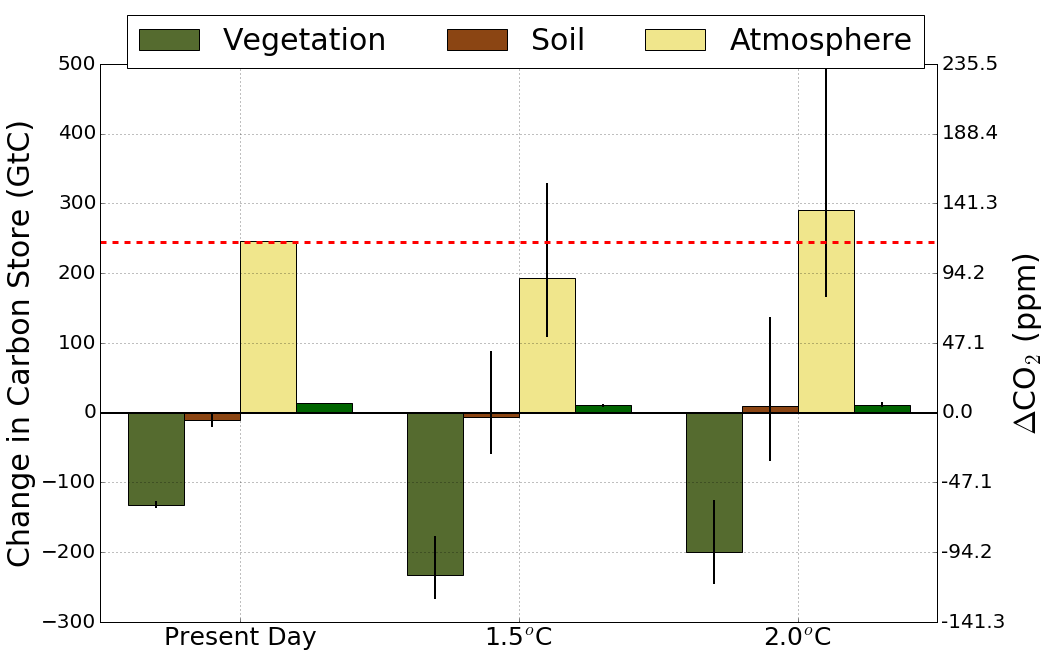

In [21]:
# plot Delta Cstores
fig,ax=plt.subplots(ncols=1,nrows=1,figsize=[15,10])

bar_width=0.2
ax.set_xlim([0,nSCENARIOs])

for iscenario in range(nSCENARIOs):
    scenario=SCENARIOs[iscenario]
    CV = np.array(DATA_DICT[scenario]['CV']-PreI_DICT['CV'])*1e-12
    CS = np.array(DATA_DICT[scenario]['CS']-PreI_DICT['CS'])*1e-12
    WP = np.array(DATA_DICT[scenario]['Woody_Products'])*1e-12
    Land_C = CV+CS
    AtmCO2 = np.array(DATA_DICT[scenario]['AtmCO2_kg']-PreI_DICT['AtmCO2_kg'])*1e-12
    #OceanCO2 = np.array(DATA_DICT[scenario]['OceanCO2'])*1e-12
    print(DATA_DICT[scenario]['AtmCO2_ppm'])
    
    # Land position, iSCENARIO-0.2
    xpos = iscenario+0.5-0.4
    ax.bar(xpos,np.mean(CV),color='darkolivegreen',width=bar_width)
    #cs_bar=ax.bar(xpos,np.mean(CS),bottom=np.mean(CV),color='saddlebrown',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(CV),np.max(CV)],c='k',lw=2)
    xpos = iscenario+0.5-0.2
    ax.bar(xpos,np.mean(CS),color='saddlebrown',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(CS),np.max(CS)],c='k',lw=2)
    
    xpos = iscenario+0.5+0.
    ax.bar(xpos,np.mean(AtmCO2),color='khaki',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(AtmCO2),np.max(AtmCO2)],c='k',lw=2)
    
    xpos = iscenario+0.5+0.2
    ax.bar(xpos,np.mean(WP),color='darkgreen',width=bar_width)
    ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(WP),np.max(WP)],c='k',lw=2)
    
    #xpos = iscenario+0.5+0.2
    #ocean_bar=ax.bar(xpos,np.mean(OceanCO2),color='turquoise',width=bar_width)
    #ax.plot([xpos+bar_width/2,xpos+bar_width/2],[np.min(OceanCO2),np.max(OceanCO2)],c='k',lw=2)
    
ax.plot(ax.get_xlim(),[0,0],c='k',lw=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.tick_params(labelright=True)
ax.set_xticks(np.arange(0.5,nSCENARIOs,1.))
ax.set_xticklabels(SCENARIO_names,fontsize=25)
ax.set_ylabel('Change in Carbon Store (GtC)',fontsize=30)
ax.tick_params(axis='y',labelsize=20)
ax.grid(True)

# right hand labels in ppm
ax2=ax.twinx()
ax2.set_ylabel('$\Delta$CO$_2$ (ppm)',fontsize=30)
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks=ax.get_yticks()
ax2.set_yticklabels([label*GtC_to_ppm for label in ax.get_yticks()])
ax2.tick_params(axis='y',labelsize=20)
#Plot present day CO2 in red:
present_CO2=(400/GtC_to_ppm)-(PreI_DICT['AtmCO2_kg']*1e-12)
print(present_CO2)
ax2.plot(ax2.get_xlim(),[present_CO2,present_CO2],c='r',lw=3,ls='--')


#fig.legend([cv_bar,cs_bar,atm_bar,ocean_bar],['Vegetation','Soil','Atmosphere','Ocean'],\
#          loc='upper center',ncol=4,fontsize=30)
fig.legend([cv_bar,cs_bar,atm_bar],['Vegetation','Soil','Atmosphere'],\
          loc=9,ncol=4,fontsize=30)  #'upper center'

fig.savefig(PLOT_DIR+'Equilibrium_DeltaCarbonStores.png')

In [22]:
labels=ax.get_yticks()
label=labels[0]
print(label)


-300.0


In [23]:
Tile_Dict = { scenario:{tile:[] for tile in Tile_names} for scenario in SCENARIOs }

for scenario in SCENARIOs:
    for iTile in range(nTiles):
        for i_gcm in range(nGCMs):
            Tile_Dict[scenario][Tile_names[iTile]].append(DATA_DICT[scenario]['frac'][i_gcm][iTile])
        Tile_Dict[scenario][Tile_names[iTile]] = np.array(Tile_Dict[scenario][Tile_names[iTile]])



In [24]:
#PreI_DICT['frac']

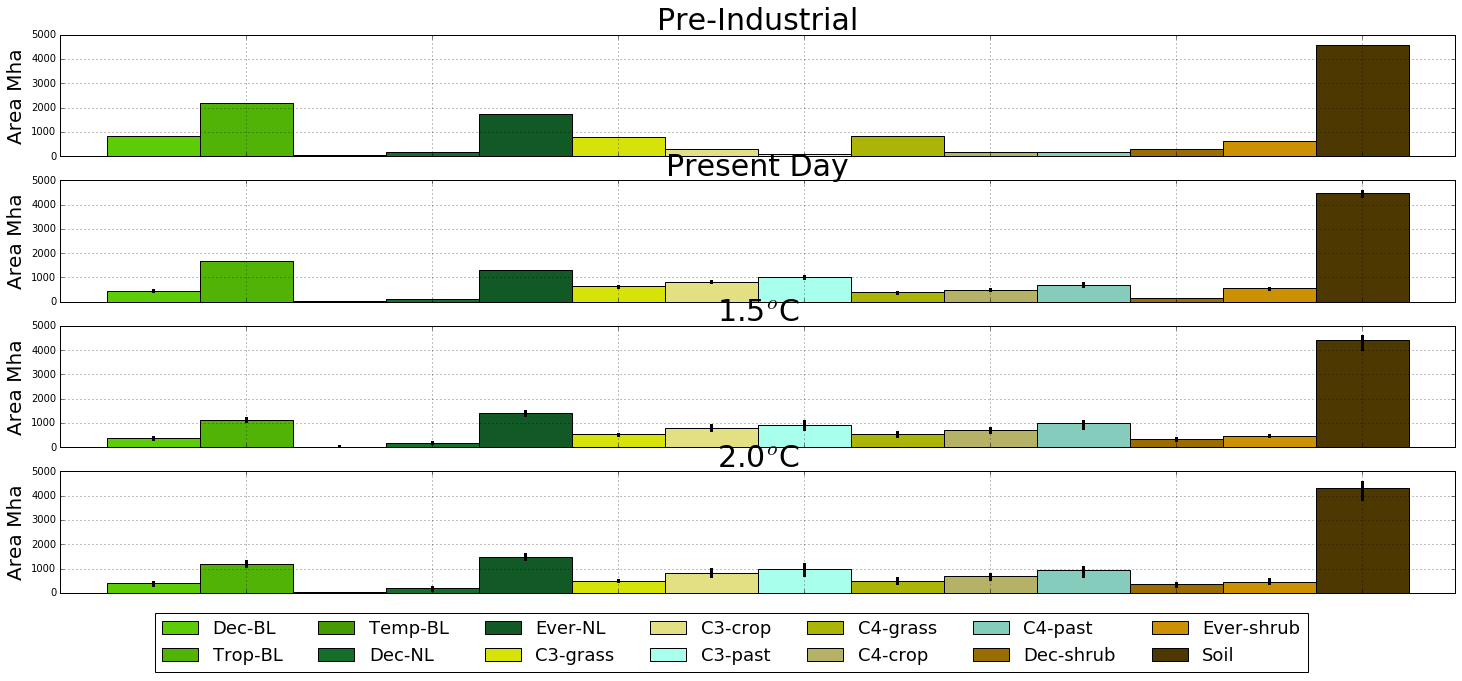

In [25]:
fig,axes=plt.subplots(ncols=1,nrows=1+nSCENARIOs,figsize=[25,10])

plotTiles_locs = list(range(13))+[15]
nPLOTtiles=len(plotTiles_locs)

bar_width=1.
#OceanCO2 = np.array(DATA_DICT[scenario]['OceanCO2'])*1e-12
# Land position, iSCENARIO-0.2
ax=axes[0]
for iTilea in range(nPLOTtiles):  # Tiles):
    xpos=iTilea+0.5
    iTile=plotTiles_locs[iTilea]
    ax.bar(xpos,PreI_DICT['frac'][iTile],color=Tile_colours[iTile],width=bar_width,label=Tile_names[iTile])
ax.set_ylabel('Area Mha',fontsize=20)
ax.set_xticklabels(['' for i in range(nPLOTtiles)])
ax.set_xlim([0,nPLOTtiles+1])
ax.set_title('Pre-Industrial',fontsize=30)
ax.grid(True)

for iscenario in range(nSCENARIOs):
    ax=axes[iscenario+1]
    scenario=SCENARIOs[iscenario]
    for iTilea in range(nPLOTtiles):  # Tiles):
        xpos=iTilea+0.5
        iTile=plotTiles_locs[iTilea]
        tile=Tile_names[iTile]
        ax.bar(xpos,np.mean(Tile_Dict[scenario][tile]),color=Tile_colours[iTile],width=bar_width)
        ax.plot([xpos+0.5,xpos+0.5],[np.min(Tile_Dict[scenario][tile]),np.max(Tile_Dict[scenario][tile])],lw=3,c='k')
    ax.set_ylabel('Area Mha',fontsize=20)
    #ax.set_xticklabels(['' for i in range(nTiles)])
    ax.set_xticklabels(['' for i in range(nPLOTtiles)])
    ax.set_xlim([0,nPLOTtiles+1])
    ax.set_title(SCENARIO_names[iscenario],fontsize=30)
    ax.grid(True)

handles,labels = axes[0].get_legend_handles_labels()
fig.legend(handles,labels,ncol=int(np.ceil(nPLOTtiles/2.)),loc=8,fontsize=18)

fig.savefig(PLOT_DIR+'Equilibrium_CoverFractions.png')

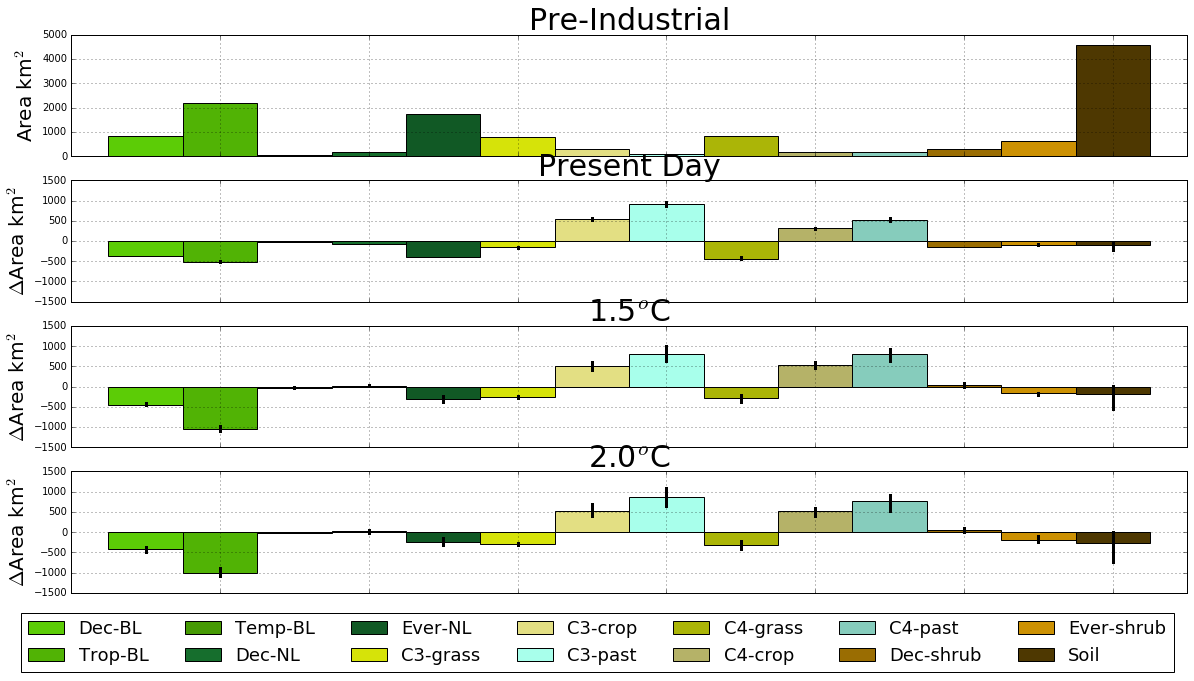

In [26]:
fig,axes=plt.subplots(ncols=1,nrows=1+nSCENARIOs,figsize=[20,10])

plotTiles_locs = list(range(13))+[15]
nPLOTtiles=len(plotTiles_locs)

bar_width=1.
#OceanCO2 = np.array(DATA_DICT[scenario]['OceanCO2'])*1e-12
# Land position, iSCENARIO-0.2
ax=axes[0]
for iTilea in range(nPLOTtiles):  # Tiles):
    xpos=iTilea+0.5
    iTile=plotTiles_locs[iTilea]
    ax.bar(xpos,PreI_DICT['frac'][iTile],color=Tile_colours[iTile],width=bar_width,label=Tile_names[iTile])
ax.set_ylabel('Area km$^2$',fontsize=20)
ax.set_xticklabels(['' for i in range(nPLOTtiles)])
ax.set_xlim([0,nPLOTtiles+1])
ax.set_title('Pre-Industrial',fontsize=30)
ax.grid(True)

for iscenario in range(nSCENARIOs):
    ax=axes[iscenario+1]
    scenario=SCENARIOs[iscenario]
    for iTilea in range(nPLOTtiles):  # Tiles):
        xpos=iTilea+0.5
        iTile=plotTiles_locs[iTilea]
        tile=Tile_names[iTile]
        DIFF_DATA=Tile_Dict[scenario][tile]-PreI_DICT['frac'][iTile]
        ax.bar(xpos,np.mean(DIFF_DATA),color=Tile_colours[iTile],width=bar_width)
        ax.plot([xpos+0.5,xpos+0.5],[np.min(DIFF_DATA),np.max(DIFF_DATA)],lw=3,c='k')
               
    ax.set_ylabel('$\Delta$Area km$^2$',fontsize=20)
    #ax.set_xticklabels(['' for i in range(nTiles)])
    ax.set_xticklabels(['' for i in range(nPLOTtiles)])
    ax.set_xlim([0,nPLOTtiles+1])
    ax.set_ylim([-1500,1500])
    ax.set_title(SCENARIO_names[iscenario],fontsize=30)
    ax.grid(True)

handles,labels = axes[0].get_legend_handles_labels()
fig.legend(handles,labels,ncol=int(np.ceil(nPLOTtiles/2.)),loc=8,fontsize=18)
    
fig.savefig(PLOT_DIR+'Equilibrium_DeltaCoverFractions.png')

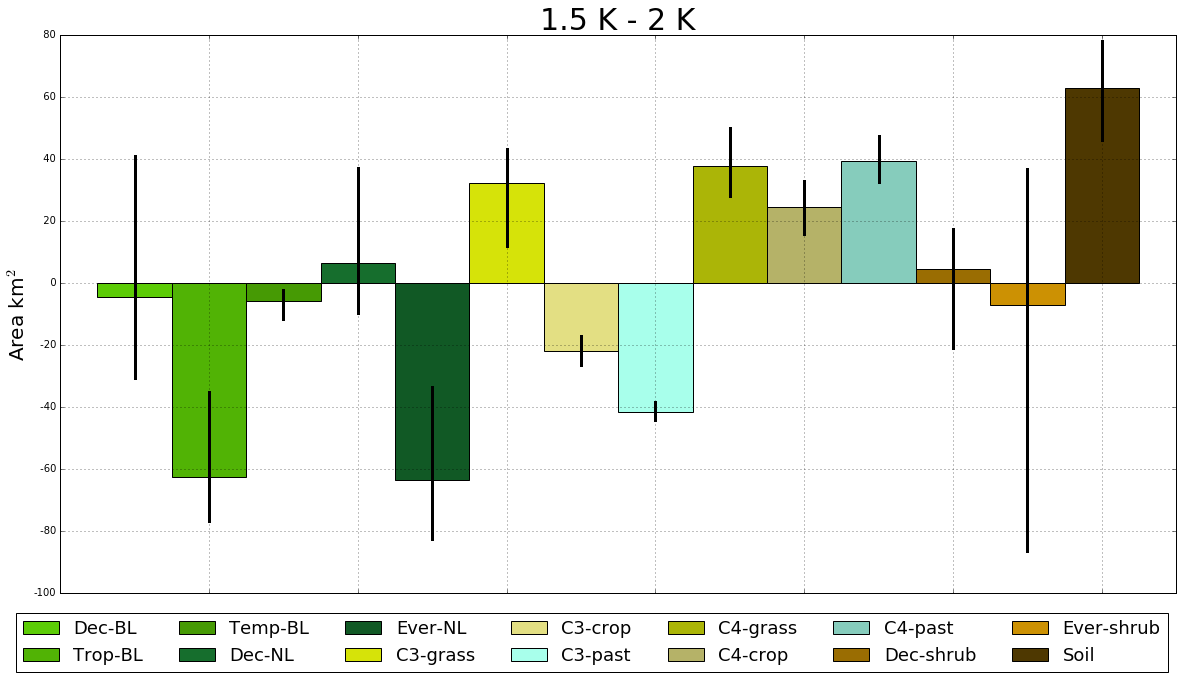

In [18]:
fig,axes=plt.subplots(ncols=1,nrows=1,figsize=[20,10])

plotTiles_locs = list(range(13))+[15]
nPLOTtiles=len(plotTiles_locs)

bar_width=1.
#OceanCO2 = np.array(DATA_DICT[scenario]['OceanCO2'])*1e-12
# Land position, iSCENARIO-0.2
ax=axes
for iTilea in range(nPLOTtiles):  # Tiles):
    xpos=iTilea+0.5
    iTile=plotTiles_locs[iTilea]
    tile=Tile_names[iTile]
    DIFF_DATA=Tile_Dict['1p5equi'][tile]-Tile_Dict['2equi'][tile]
    ax.bar(xpos,np.mean(DIFF_DATA),color=Tile_colours[iTile],width=bar_width,label=Tile_names[iTile])
    ax.plot([xpos+0.5,xpos+0.5],[np.min(DIFF_DATA),np.max(DIFF_DATA)],lw=3,c='k')
ax.set_ylabel('Area km$^2$',fontsize=20)
ax.set_xticklabels(['' for i in range(nPLOTtiles)])
ax.set_xlim([0,nPLOTtiles+1])
ax.set_yticklabels([str('%4i'%label) for label in ax.get_yticks()])
ax.set_title('1.5 K - 2 K',fontsize=30)
ax.grid(True)

handles,labels = axes.get_legend_handles_labels()
fig.legend(handles,labels,ncol=int(np.ceil(nPLOTtiles/2.)),loc=8,fontsize=18)


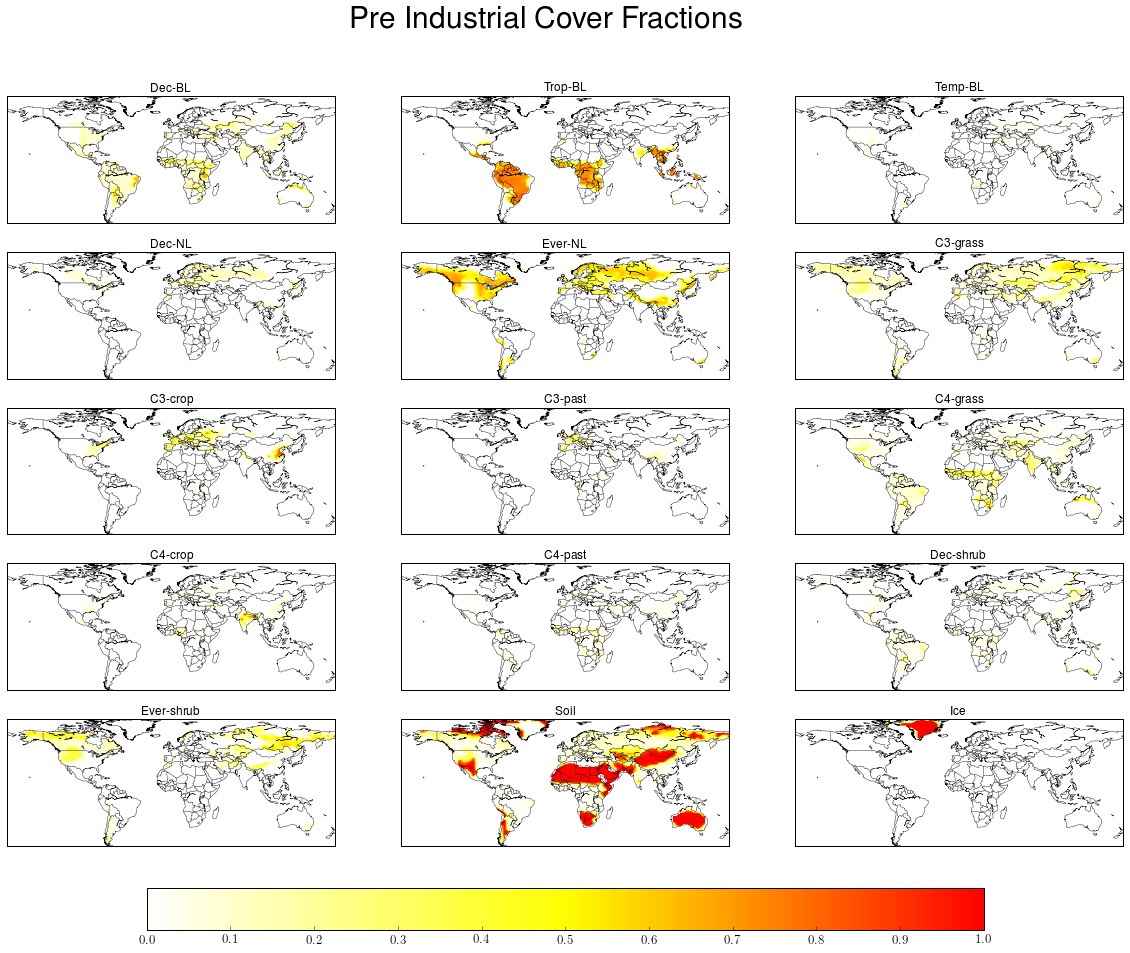

In [52]:
# only plot the PFTs and Bare soil. Urban, Ice and Lake do not change so are boring
plotTiles_locs = list(range(13))+[15,16]
nPLOTtiles=len(plotTiles_locs)

DATA_RANGE=[0,1]
nticks=11
pad=0.05; fraction=0.05
# plot Pre industrial fractions
fig,axes = plt.subplots(ncols=3,nrows=5,figsize=(20,15))

for iTilea in range(nPLOTtiles):  # Tiles):
    ax=axes.flatten()[iTilea]
    iTile = plotTiles_locs[iTilea]
    tile=Tile_names[iTile]
    plot_data=MapPreI_DICT[tile]
    plot_data=np.ma.masked_array(plot_data[land_index],mask=land_index.mask)
    # Plot Preindustrial
    IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                 DATA_RANGE=DATA_RANGE,
                 COLOURS=['white','yellow','red'],INTERPOLATE_COLOURS=True,NLEVELS=250,
                 CBAR_ORIENTATION='off',
                 RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                 PLOT_TITLE=tile,AXIS=ax,
                 FONTSIZES=[10,8,10,12]
                )
    
TickLEVELS = np.linspace(DATA_RANGE[0],DATA_RANGE[1],num=nticks)
CBAR=plt.colorbar(IMAGE,ax=axes.flatten().tolist(),orientation='horizontal',\
                    ticks=TickLEVELS,pad=pad,fraction=fraction)
CBAR.ax.xaxis.set_tick_params(labelsize=13)
fig.suptitle('Pre Industrial Cover Fractions',fontsize=30)
fig.savefig(PLOT_DIR+'CoverFractions_PreIndustrial.png')
fig.savefig(PLOT_DIR+'CoverFractions_PreIndustrial.eps')


In [63]:
plotTiles_locs = [ (0,1,2),(3,4),(5,8),(6,7,9,10),(11,12),[15],[16] ]
print(iTilea)
print(plotTiles_locs)

5
[(0, 1, 2), (3, 4), (5, 8), (6, 7, 9, 10), (11, 12), [15], [16]]


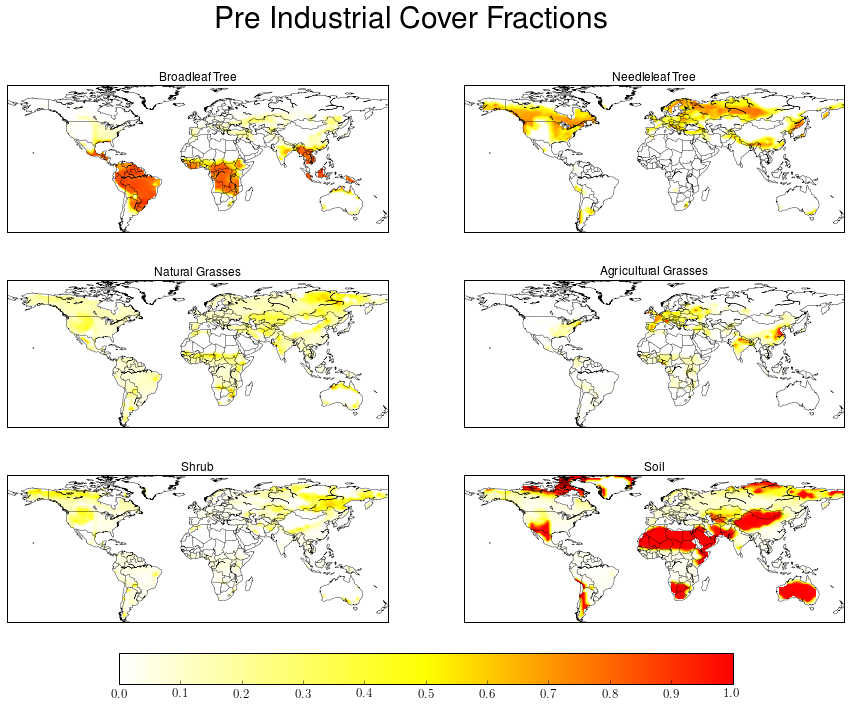

In [66]:
# only plot the PFTs and Bare soil. Urban, Ice and Lake do not change so are boring
plotTiles_locs = [ [0,1,2],[3,4],[5,8],[6,7,9,10],[11,12],[15],[16] ]

TileGroup_longnames = ['Broadleaf Tree','Needleleaf Tree','Natural Grasses','Agricultural Grasses','Shrub',
                       'Soil','Ice']
nPLOTtiles=6   #  don't plot Ice len(plotTiles_locs)

DATA_RANGE=[0,1]
nticks=11
pad=0.05; fraction=0.05
# plot Pre industrial fractions
fig,axes = plt.subplots(ncols=2,nrows=3,figsize=(15,11))

for iTilea in range(nPLOTtiles):  # Tiles):
    ax=axes.flatten()[iTilea]
    plot_tiles = plotTiles_locs[iTilea]
    tile=TileGroup_longnames[iTilea]
    
    plot_data=np.zeros_like(MapPreI_DICT['Dec-BL'])
    for iTile in plot_tiles:
        plot_data += MapPreI_DICT[Tile_names[iTile]]
    
    plot_data=np.ma.masked_array(plot_data[land_index],mask=land_index.mask)
    # Plot Preindustrial
    IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                 DATA_RANGE=DATA_RANGE,
                 COLOURS=['white','yellow','red'],INTERPOLATE_COLOURS=True,NLEVELS=250,
                 CBAR_ORIENTATION='off',
                 RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                 PLOT_TITLE=tile,AXIS=ax,
                 FONTSIZES=[10,8,10,12]
                )
    
TickLEVELS = np.linspace(DATA_RANGE[0],DATA_RANGE[1],num=nticks)
CBAR=plt.colorbar(IMAGE,ax=axes.flatten().tolist(),orientation='horizontal',\
                    ticks=TickLEVELS,pad=pad,fraction=fraction)
CBAR.ax.xaxis.set_tick_params(labelsize=13)
fig.suptitle('Pre Industrial Cover Fractions',fontsize=30)
fig.savefig(PLOT_DIR+'CoverFractionsGrouped_PreIndustrial.png')
fig.savefig(PLOT_DIR+'CoverFractionsGrouped_PreIndustrial.eps')


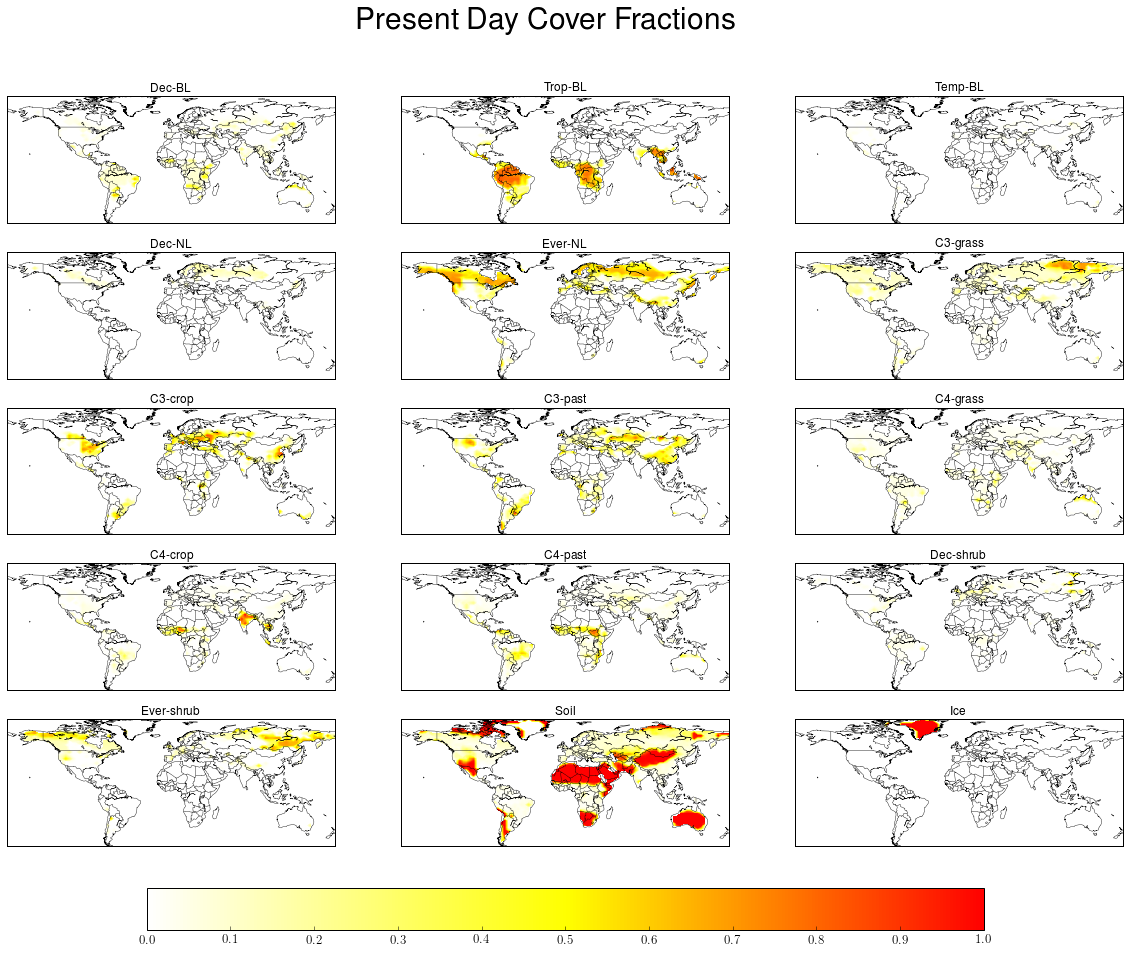

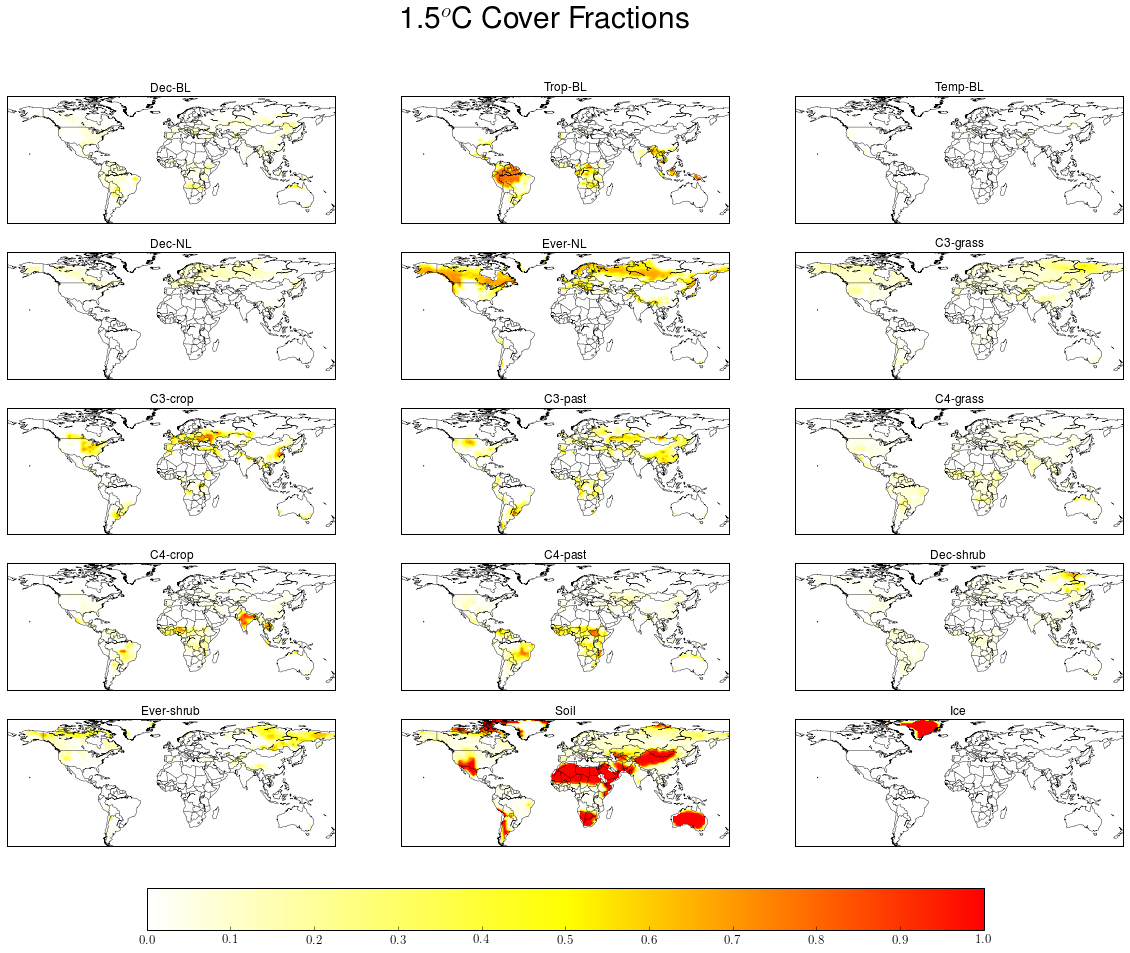

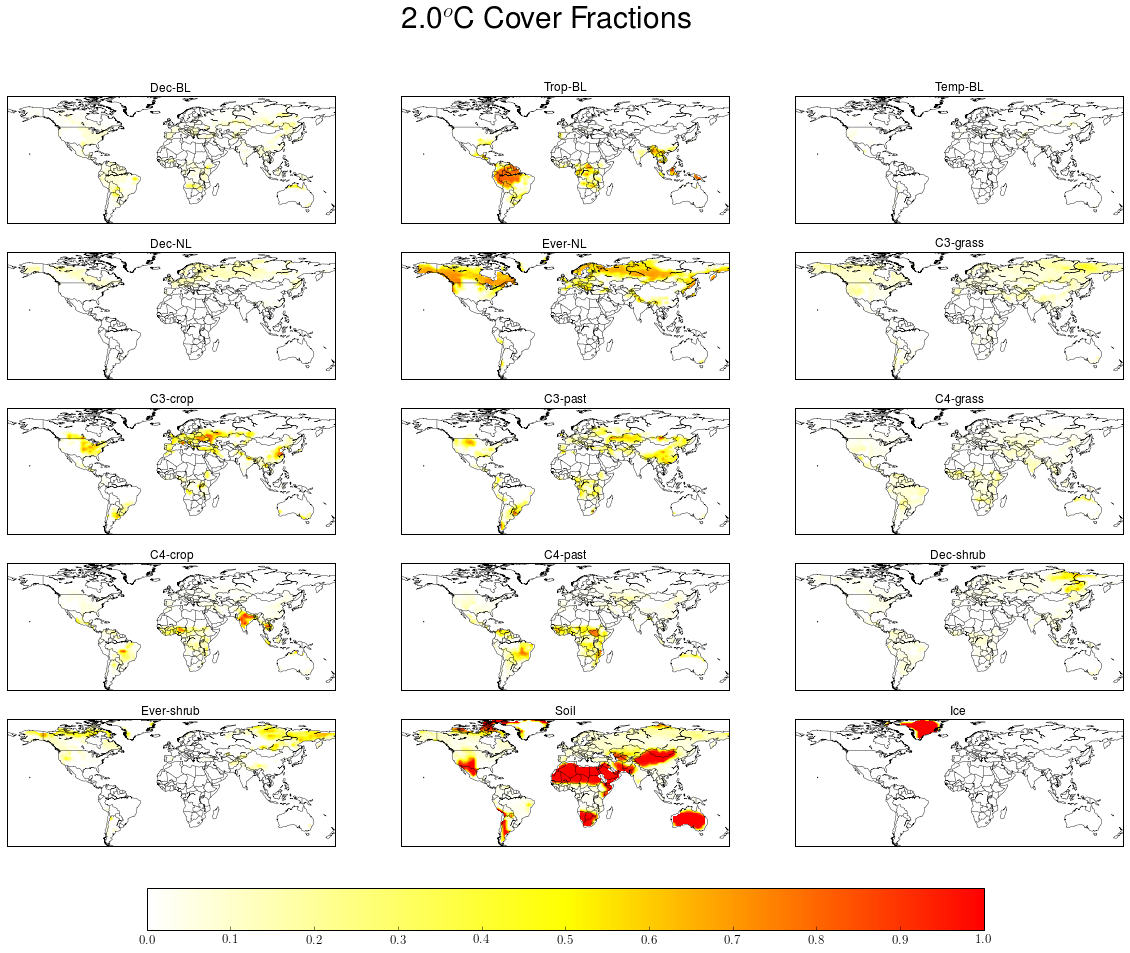

In [53]:
# only plot the PFTs and Bare soil. Urban, Ice and Lake do not change so are boring
plotTiles_locs = list(range(13))+[15,16]
nPLOTtiles=len(plotTiles_locs)

DATA_RANGE=[0,1]
nticks=11
pad=0.05; fraction=0.05

for iscenario in range(nSCENARIOs):
    scenario=SCENARIOs[iscenario]
    scen_name=SCENARIO_names[iscenario]
    SCEN_DICT = MAPDATA_DICT[scenario]
    # plot Pre industrial fractions
    fig,axes = plt.subplots(ncols=3,nrows=5,figsize=(20,15))
    for iTilea in range(nPLOTtiles):  # Tiles):
        ax=axes.flatten()[iTilea]
        iTile = plotTiles_locs[iTilea]
        tile=Tile_names[iTile]
        plot_data=np.array(SCEN_DICT[tile]).mean(axis=0)
        plot_data=np.ma.masked_array(plot_data[land_index],mask=land_index.mask)
        # Plot Preindustrial
        IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                           DATA_RANGE=DATA_RANGE,
                           COLOURS=['white','yellow','red'],INTERPOLATE_COLOURS=True,NLEVELS=250,
                           CBAR_ORIENTATION='off',
                           RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                           PLOT_TITLE=tile,AXIS=ax,
                           FONTSIZES=[10,8,10,12]
                          )
        
    TickLEVELS = np.linspace(DATA_RANGE[0],DATA_RANGE[1],num=nticks)
    CBAR=plt.colorbar(IMAGE,ax=axes.flatten().tolist(),orientation='horizontal',\
                      ticks=TickLEVELS,pad=pad,fraction=fraction)
    CBAR.ax.xaxis.set_tick_params(labelsize=13)
    fig.suptitle(scen_name+' Cover Fractions',fontsize=30)
    fig.savefig(PLOT_DIR+'CoverFractions_'+scenario+'.png')
    fig.savefig(PLOT_DIR+'CoverFractions_'+scenario+'.eps')
    plt.show()


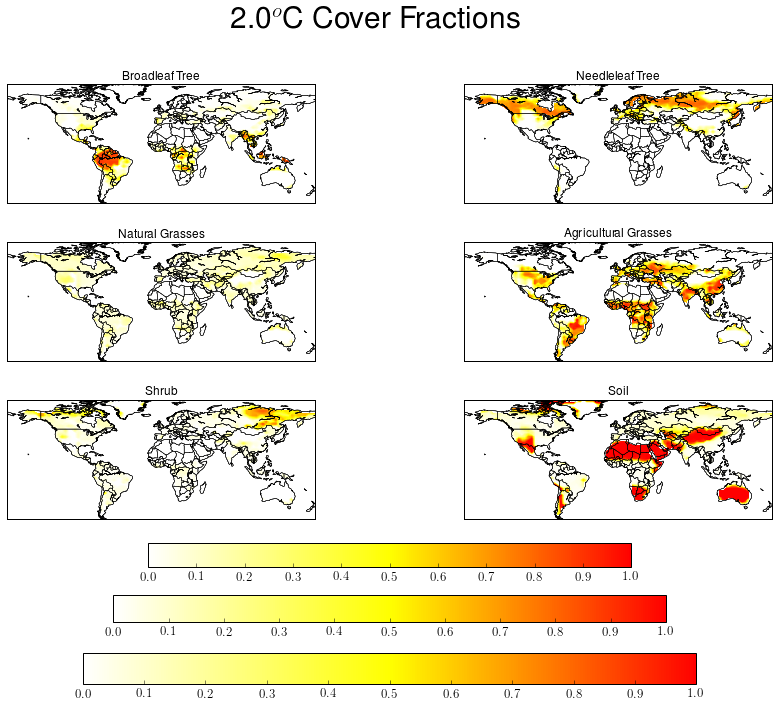

In [75]:
# only plot the PFTs and Bare soil. Urban, Ice and Lake do not change so are boring
plotTiles_locs = [ [0,1,2],[3,4],[5,8],[6,7,9,10],[11,12],[15],[16] ]

TileGroup_longnames = ['Broadleaf Tree','Needleleaf Tree','Natural Grasses','Agricultural Grasses','Shrub',
                       'Soil','Ice']
nPLOTtiles=6   #  don't plot Ice len(plotTiles_locs)

DATA_RANGE=[0,1]
nticks=11
pad=0.05; fraction=0.05
# plot Pre industrial fractions
fig,axes = plt.subplots(ncols=2,nrows=3,figsize=(15,11))

for iscenario in range(nSCENARIOs):
    scenario=SCENARIOs[iscenario]
    scen_name=SCENARIO_names[iscenario]
    SCEN_DICT = MAPDATA_DICT[scenario]
    
    for iTilea in range(nPLOTtiles):  # Tiles):
        ax=axes.flatten()[iTilea]
        plot_tiles = plotTiles_locs[iTilea]
        tile=TileGroup_longnames[iTilea]
        
        plot_data=np.zeros_like(SCEN_DICT['Dec-BL'][0])
        for iTile in plot_tiles:
            plot_data += np.array(SCEN_DICT[Tile_names[iTile]]).mean(axis=0)
            
        plot_data=np.ma.masked_array(plot_data[land_index],mask=land_index.mask)
        # Plot Preindustrial
        IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                           DATA_RANGE=DATA_RANGE,
                           COLOURS=['white','yellow','red'],INTERPOLATE_COLOURS=True,NLEVELS=250,
                           CBAR_ORIENTATION='off',
                           RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                           PLOT_TITLE=tile,AXIS=ax,
                           FONTSIZES=[10,8,10,12]
                          )
        
    TickLEVELS = np.linspace(DATA_RANGE[0],DATA_RANGE[1],num=nticks)
    CBAR=plt.colorbar(IMAGE,ax=axes.flatten().tolist(),orientation='horizontal',\
                      ticks=TickLEVELS,pad=pad,fraction=fraction)
    CBAR.ax.xaxis.set_tick_params(labelsize=13)
    fig.suptitle(scen_name+' Cover Fractions',fontsize=30)
    fig.savefig(PLOT_DIR+'CoverFractionsGrouped_'+scenario+'.png')
    fig.savefig(PLOT_DIR+'CoverFractionsGrouped_'+scenario+'.eps')

    

In [74]:
print(len(SCEN_DICT['Dec-BL']))
print(np.array(SCEN_DICT[Tile_names[iTile]]).mean(axis=0).shape)
print(plot_data.shape)

34
(1631,)
(34, 1631)


In [49]:
np.array(plot_data).mean(axis=0).shape

(1631,)

Present Day


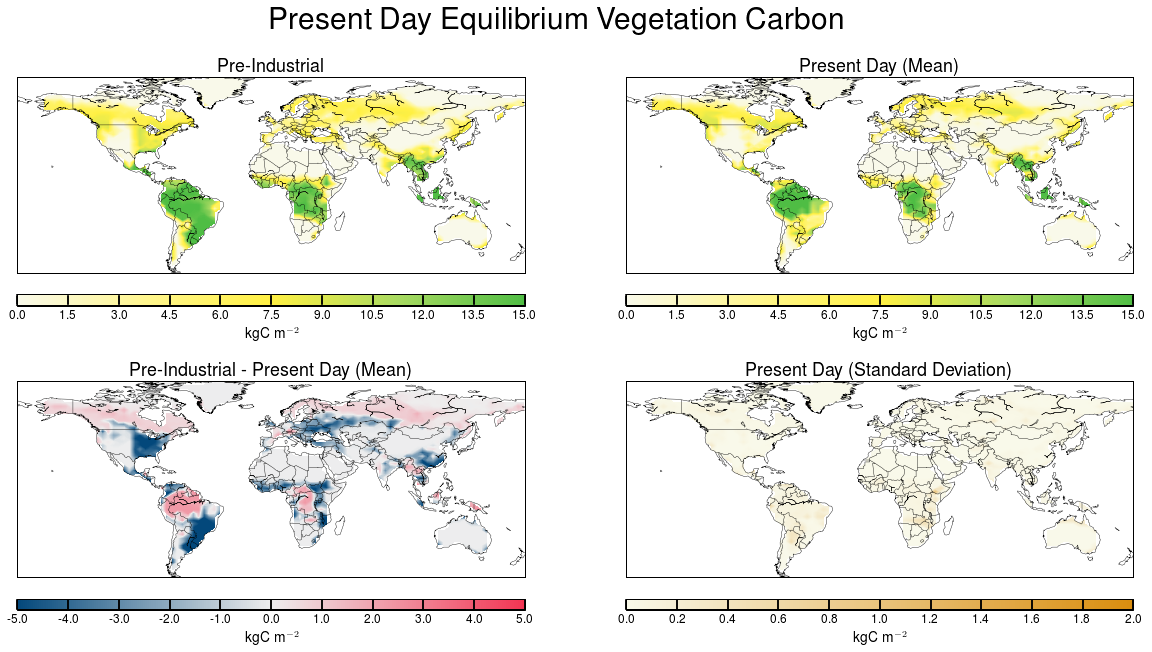

1.5$^o$C


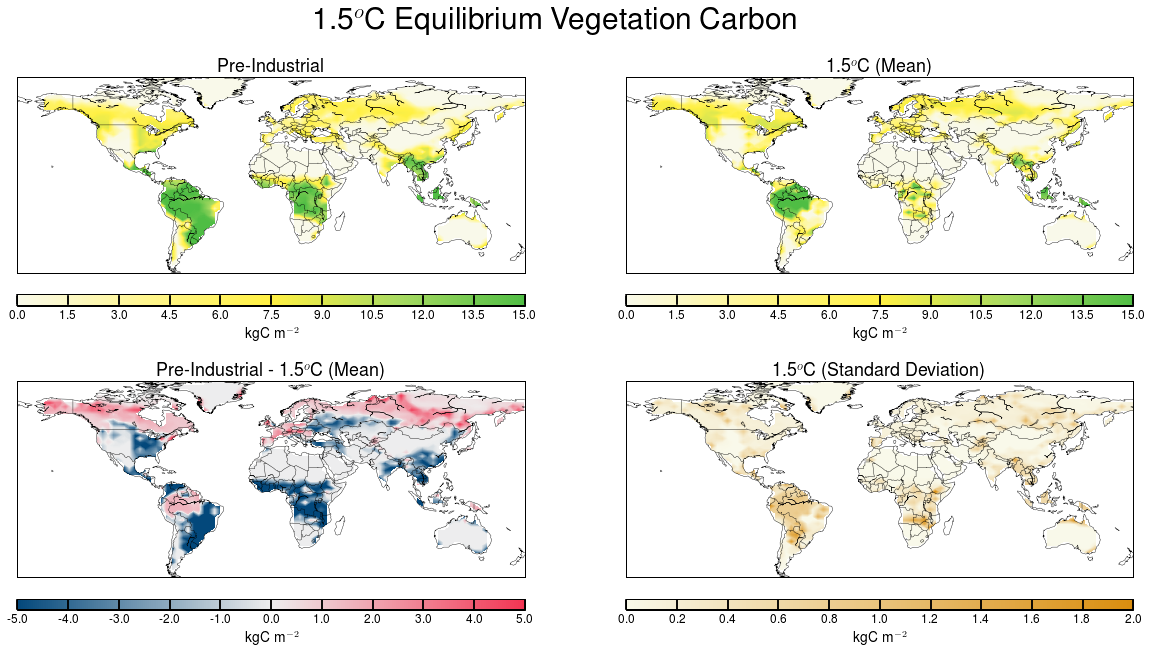

2.0$^o$C


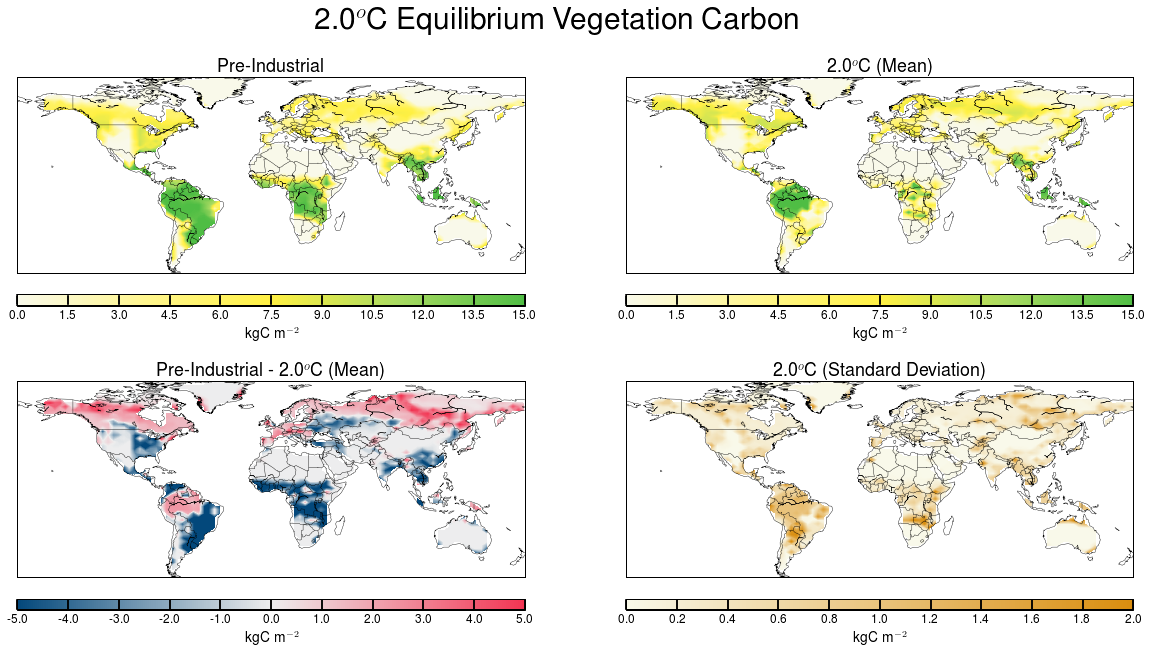

In [51]:
# plot maps of CV, and the change in CV:
variable='CV'
long_name='Vegetation Carbon'
map_unit='kgC m$^{-2}$'
Abs_range=[0,15]
#Abs_Colours=['#eeeeee','#fff68f','#e5d83c','#a8da61','#4fbd44']
Abs_Colours=['#f9f9ea','#fff68f','#fff043','#a8da61','#4fbd44']
Diff_range=[-5,5]
Diff_Colours=['#03487b','#eeeeee','#f23452']
#Dev_range=[0,100]
Dev_range=[0,2]
Dev_Colours=['#f9f9ea','#d98d0e']



PreI_map_Data=MapPreI_DICT[variable]
PreI_plotdata=np.ma.masked_array(PreI_map_Data[land_index],mask=land_index.mask)
#print(PreI_map_Data.shape)
#print(PreI_plotdata)
for iscenario in range(nSCENARIOs):
    scenario  = SCENARIOs[iscenario]
    scen_name = SCENARIO_names[iscenario]
    print(scen_name)
    
    FIG,AXES=plt.subplots(ncols=2,nrows=2,figsize=[20,10])
    
    # Plot Preindustrial
    PTs.plot_map(PreI_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Abs_range,
                 COLOURS=Abs_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                 PLOT_TITLE='Pre-Industrial',AXIS=AXES[0,0],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                )
    
    SCEN_mean_map_DATA=np.mean(np.array(MAPDATA_DICT[scenario][variable]),axis=0)
    SCEN_mean_plotdata=np.ma.masked_array(SCEN_mean_map_DATA[land_index],mask=land_index.mask)
    #print(SCEN_mean_map_DATA.shape)
    PTs.plot_map(SCEN_mean_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Abs_range,
                 COLOURS=Abs_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',
                 PLOT_TITLE=scen_name+' (Mean)',AXIS=AXES[0,1],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                 )
    
    SCEN_DIFF_DATA = np.array(MAPDATA_DICT[scenario][variable])-PreI_map_Data
    #print(SCEN_DIFF_DATA.shape)
    SCEN_mean_diff_map = np.mean(SCEN_DIFF_DATA,axis=0)
    SCEN_diff_plotdata=np.ma.masked_array(SCEN_mean_diff_map[land_index],mask=land_index.mask)
    #print(SCEN_mean_diff_map.shape)
    PTs.plot_map(SCEN_diff_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Diff_range,
                 COLOURS=Diff_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',
                 PLOT_TITLE='Pre-Industrial - '+scen_name+' (Mean)',AXIS=AXES[1,0],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                 )
    
    SCEN_std_map = np.std(MAPDATA_DICT[scenario][variable],axis=0)
    #SCEN_perc_dev_map = (SCEN_std_map/SCEN_mean_map_DATA)*100.
    #SCEN_std_plotdata=np.ma.masked_array(SCEN_perc_dev_map[land_index],mask=land_index.mask)
    SCEN_std_plotdata=np.ma.masked_array(SCEN_std_map[land_index],mask=land_index.mask)
    #print(SCEN_mean_diff_map.shape)
    PTs.plot_map(SCEN_std_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Dev_range,
                 COLOURS=Dev_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',
                 PLOT_TITLE=scen_name+'  (Standard Deviation)',AXIS=AXES[1,1],
                 #CBAR_LABEL='\% of Mean',FONTSIZES=[12,12,14,18],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18],
                 )
    
    FIG.suptitle(scen_name+' Equilibrium '+long_name,fontsize=30)
    #PTs.plot_map_multi( [PreI_plotdata,SCEN_mean_plotdata,SCEN_diff_plotdata,SCEN_std_plotdata],
    #                    [lons_2d for i in range(4)],[lats_2d for i in range(4)],
    #                   PLOT_TITLES=['Pre-Industrial',scen_name,'Mean Difference','Standard Deviation'],
    #                  Ncols=2, Nrows=2,lDISPLAY=True)
    
    FIG.savefig(PLOT_DIR+'Map_'+variable+'_'+scenario+'.png')
    plt.show()
    
    

Present Day
1.5$^o$C
2.0$^o$C


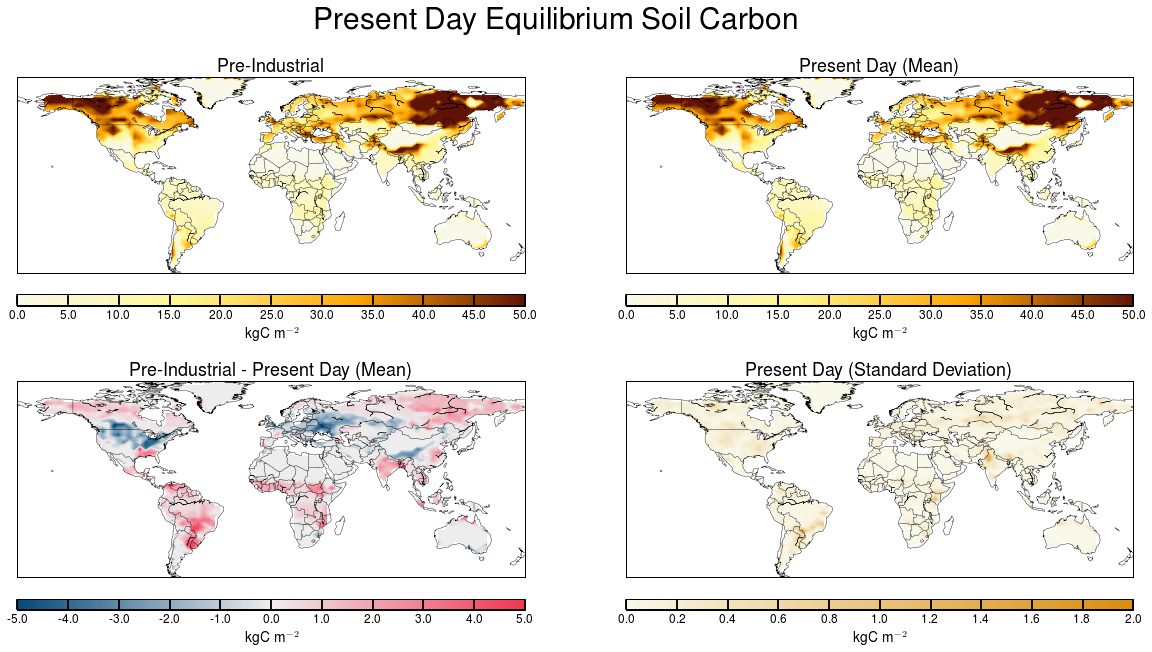

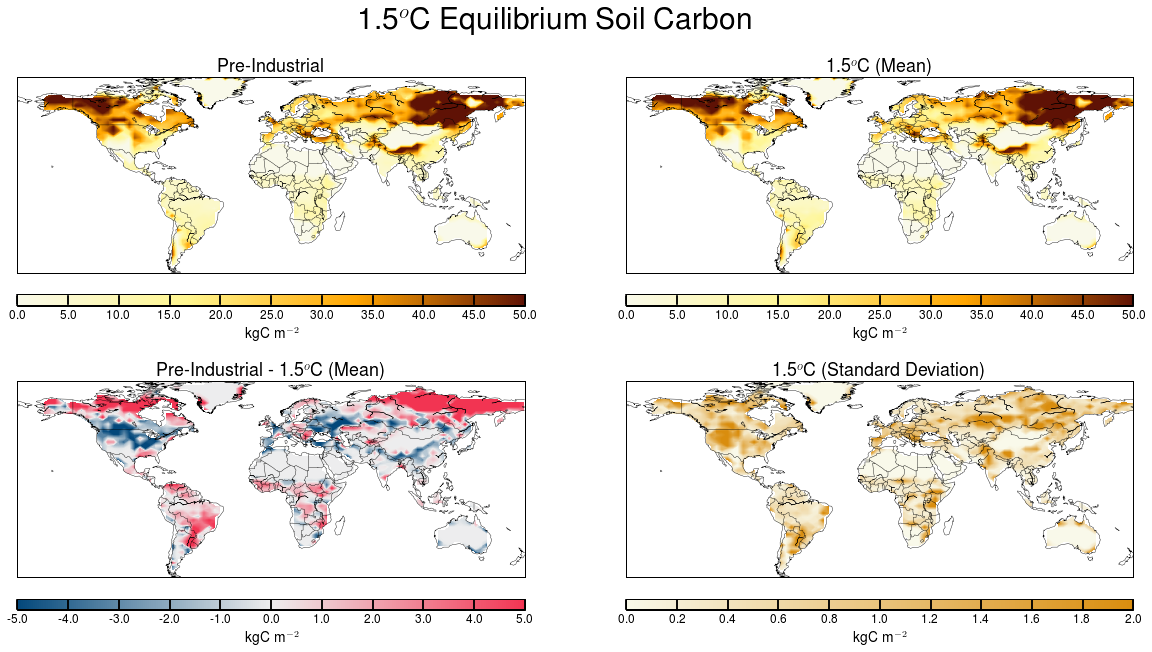

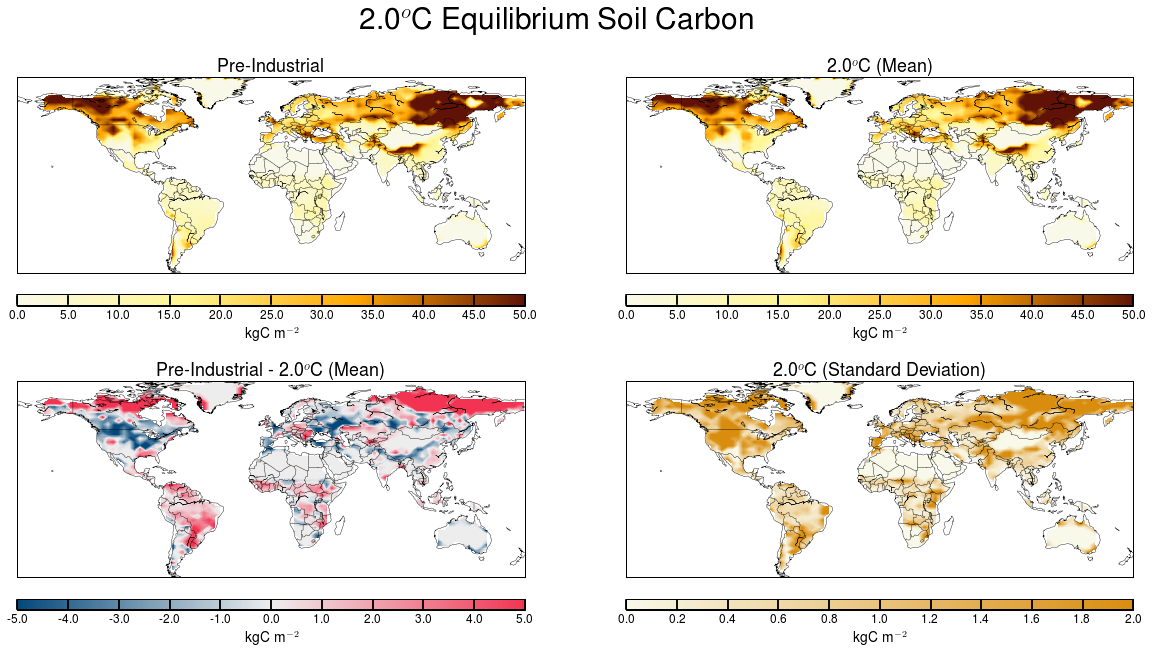

In [20]:
# plot maps of CV, and the change in CV:
variable='CS'
long_name='Soil Carbon'
map_unit='kgC m$^{-2}$'
Abs_range=[0,50]
#Abs_Colours=['#eeeeee','#fff68f','#ffa500','#5f1205']
Abs_Colours=['#f9f9ea','#fff68f','#ffa500','#5f1205']
Diff_range=[-5,5]
Diff_Colours=['#03487b','#eeeeee','#f23452']
#Dev_range=[0,100]
#Dev_Colours=['#eeeeee','#f23452']
Dev_range=[0,2]
Dev_Colours=['#f9f9ea','#d98d0e']



#del PreI_plotdata
PreI_map_Data=np.copy(MapPreI_DICT[variable])
PreI_plotdata=np.ma.masked_array(PreI_map_Data[land_index],mask=land_index.mask)
#print(PreI_plotdata2)

for iscenario in range(nSCENARIOs):
    scenario  = SCENARIOs[iscenario]
    scen_name = SCENARIO_names[iscenario]
    print(scen_name)
    
    FIG,AXES=plt.subplots(ncols=2,nrows=2,figsize=[20,10])
    
    # Plot Preindustrial
    PTs.plot_map(PreI_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Abs_range,
                 COLOURS=Abs_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                 PLOT_TITLE='Pre-Industrial',AXIS=AXES[0,0],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                )
    
    SCEN_mean_map_DATA=np.mean(np.array(MAPDATA_DICT[scenario][variable]),axis=0)
    SCEN_mean_plotdata=np.ma.masked_array(SCEN_mean_map_DATA[land_index],mask=land_index.mask)
    #print(SCEN_mean_map_DATA.shape)
    PTs.plot_map(SCEN_mean_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Abs_range,
                 COLOURS=Abs_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',
                 PLOT_TITLE=scen_name+' (Mean)',AXIS=AXES[0,1],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                 )
    
    SCEN_DIFF_DATA = np.array(MAPDATA_DICT[scenario][variable])-PreI_map_Data
    #print(SCEN_DIFF_DATA.shape)
    SCEN_mean_diff_map = np.mean(SCEN_DIFF_DATA,axis=0)
    SCEN_diff_plotdata=np.ma.masked_array(SCEN_mean_diff_map[land_index],mask=land_index.mask)
    #print(SCEN_mean_diff_map.shape)
    PTs.plot_map(SCEN_diff_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Diff_range,
                 COLOURS=Diff_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',
                 PLOT_TITLE='Pre-Industrial - '+scen_name+' (Mean)',AXIS=AXES[1,0],
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                 )
    
    SCEN_std_map = np.std(MAPDATA_DICT[scenario][variable],axis=0)
    SCEN_perc_dev_map = (SCEN_std_map/SCEN_mean_map_DATA)*100.
    #SCEN_std_plotdata=np.ma.masked_array(SCEN_perc_dev_map[land_index],mask=land_index.mask)
    SCEN_std_plotdata=np.ma.masked_array(SCEN_std_map[land_index],mask=land_index.mask)
    #print(SCEN_mean_diff_map.shape)
    PTs.plot_map(SCEN_std_plotdata,lons_2d,lats_2d,
                 DATA_RANGE=Dev_range,
                 COLOURS=Dev_Colours,INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=11,
                 RESOLUTION='c', MAP_TYPE='Contour',
                 PLOT_TITLE=scen_name+'  (Standard Deviation)',AXIS=AXES[1,1],
                 #CBAR_LABEL='\% of Mean',FONTSIZES=[12,12,14,18]
                 CBAR_LABEL=map_unit,FONTSIZES=[12,12,14,18]
                 )
    
    FIG.suptitle(scen_name+' Equilibrium '+long_name,fontsize=30)

    FIG.savefig(PLOT_DIR+'Map_'+variable+'_'+scenario+'.png')    
    
    


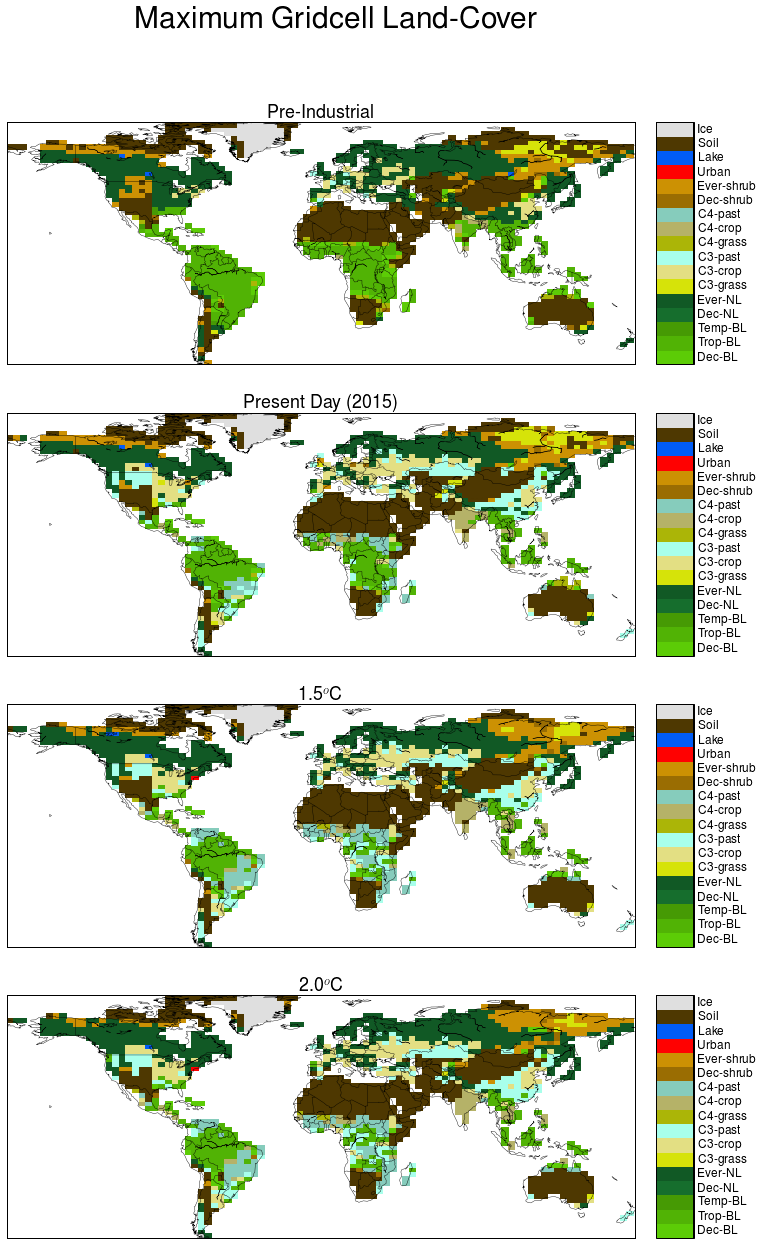

In [21]:
#Plot Max Frac data:

FIG,AXES=plt.subplots(ncols=1,nrows=4,figsize=[15,20])

plotdata=np.ma.masked_array(MapPreI_DICT['Max_Frac'][land_index],mask=land_index.mask)
PTs.plot_map(plotdata,lons_2d,lats_2d,
             COLOURS=Tile_colours,DATA_RANGE=[0,nTiles+0.1],
             TickLEVELS=list(np.arange(0.5,nTiles+1,1)),TickLABELS=Tile_names,
             CBAR_TICK_LENGTH=0,CLEVELS=range(nTiles+1),CBAR_ORIENTATION='vertical',
             PLOT_TITLE='Pre-Industrial',FONTSIZES=[12,12,14,18],
             RESOLUTION='c',
             AXIS=AXES[0],
            )


scenario='presentday'
scen_name='Present Day (2015)'
plotdata=np.ma.masked_array(MAPDATA_DICT[scenario]['Max_Frac'][land_index],mask=land_index.mask)
PTs.plot_map(plotdata,lons_2d,lats_2d,
             COLOURS=Tile_colours,DATA_RANGE=[0,nTiles+0.1],
             TickLEVELS=list(np.arange(0.5,nTiles+1,1)),TickLABELS=Tile_names,
             CBAR_TICK_LENGTH=0,CLEVELS=range(nTiles+1),CBAR_ORIENTATION='vertical',
             PLOT_TITLE=scen_name,FONTSIZES=[12,12,14,18],
             RESOLUTION='c',
             AXIS=AXES[1],
            )

scenario='1p5equi'
scen_name='1.5$^o$C'
plotdata=np.ma.masked_array(MAPDATA_DICT[scenario]['Max_Frac'][land_index],mask=land_index.mask)
PTs.plot_map(plotdata,lons_2d,lats_2d,
             COLOURS=Tile_colours,DATA_RANGE=[0,nTiles+0.1],
             TickLEVELS=list(np.arange(0.5,nTiles+1,1)),TickLABELS=Tile_names,
             CBAR_TICK_LENGTH=0,CLEVELS=range(nTiles+1),CBAR_ORIENTATION='vertical',
             PLOT_TITLE=scen_name,FONTSIZES=[12,12,14,18],
             RESOLUTION='c',
             AXIS=AXES[2],
            )

scenario='2equi'
scen_name='2.0$^o$C'
plotdata=np.ma.masked_array(MAPDATA_DICT[scenario]['Max_Frac'][land_index],mask=land_index.mask)
PTs.plot_map(plotdata,lons_2d,lats_2d,
             COLOURS=Tile_colours,DATA_RANGE=[0,nTiles+0.1],
             TickLEVELS=list(np.arange(0.5,nTiles+1,1)),TickLABELS=Tile_names,
             CBAR_TICK_LENGTH=0,CLEVELS=range(nTiles+1),CBAR_ORIENTATION='vertical',
             PLOT_TITLE=scen_name,FONTSIZES=[12,12,14,18],
             RESOLUTION='c',
             AXIS=AXES[3],
            )

FIG.suptitle('Maximum Gridcell Land-Cover',fontsize=30)
FIG.savefig(PLOT_DIR+'Map_MaxLandCover.png')   


[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


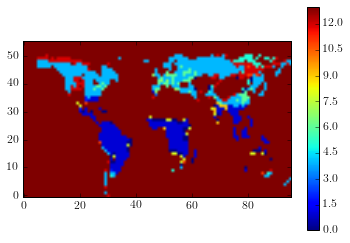

In [22]:

print(plotdata)
plt.imshow(MAX_FRAC[land_index],origin='bottom',vmin=0,vmax=13)
plt.colorbar()

In [23]:
np.array(MAPDATA_DICT['1p5equi']['CS']).shape

(3, 1631)

In [24]:
AXES.shape

(4,)

In [25]:
help(PTs.plot_map)

Help on function plot_map in module PlotTools.plot_tools:

plot_map(DATA, LONS, LATS, DATA2=None, LONS2=None, LATS2=None, GREYMASK=None, MASKCOLOR='grey', DATA_RANGE=None, LON_RANGE=None, LAT_RANGE=None, MAP_TYPE='Mesh', COLOURS=None, MPL_CBAR=None, CMAP=None, NLEVELS=None, CLEVELS=None, TickLEVELS=None, NTICKS=None, TickLABELS=None, CBAR_ORIENTATION='horizontal', CBAR_SIZE='6%', CBAR_PAD=0.3, INTERPOLATE_COLOURS=False, TICK_FORMAT='%.1f', CBAR_TICK_LENGTH=10, WIDTH=12, HEIGHT=8, CBAR_LABEL=None, PLOT_TITLE=None, FONTSIZES=[10, 10, 12, 12], iDISPLAY='N', iCLOSE='N', FILE_PLOT=None, iORIENTATION='landscape', FIGURE=None, AXIS=None, SET_OVER=None, SET_UNDER=None, LATDEL=None, LONDEL=None, RIVERS=False, RESOLUTION='i', PROJECTION='cyl', LEFT_FRAC=0.0, RIGHT_FRAC=0.0, BOTTOM_FRAC=0.0, TOP_FRAC=0.0, BOUNDINGLAT=35, LON_0=-32, LAT_0=90.0, RSPHERE=[6378137.0, 6356752.3142])
    ###############################################################################
    # Function: plot_map
    # Autho